# Twitter Velocity

## Instructions

* You are a political data consultant, and have been asked to evaluate how frequently Donald Trump tweets. As a savvy data visualization specialist, you decide on the following course of action: first, you will collect the timestamps of the 500 most recent tweets sent out by Trump. After making a list of the timestamps, you will convert the timestamps into datetime objects. Then you will calculate the time difference from one tweet to the next, and plot those data points in a scatterplot chart.

* The tools you will use for this task are Tweepy and MatPlotLib. You will also need to use the `datetime` library to convert Twitter timestamps to Python datetime objects.

* Your plot should look something like this:

* This handy chart visually demonstrates Trump's tweet pattern: the majority of his tweets are sent within five hours of each other, but he goes up to 24 hours without tweeting!

* See, in contrast, the tweet pattern of a major news organization, the LA Times, whose tweets are sent out much more frequently:


* **Note**: Feel free to plot the tweets of another Twitter account. It does not have to be Donald Trump's!

In [4]:
import pandas as pd
import json
import requests as r
from twitter_keys import Consumer_Key, Consumer_API_Secret, Access_Token, Access_Token_Secret
import tweepy 
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
%matplotlib inline

In [27]:
# Setup Tweepy API Authentication

auth = tweepy.OAuthHandler(Consumer_Key, Consumer_API_Secret)
auth.set_access_token(Access_Token, Access_Token_Secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

user_name = 'theyeezymafia'

In [23]:
tweet_time = []
for num in range(20):
    public_tweets = api.user_timeline(user_name, page = num)
    for tweet in public_tweets:
        tweet_time.append(tweet['created_at'])

In [29]:
#Testing out json structure

public_tweets = api.user_timeline(user_name)
public_tweets[0]['created_at']

'Tue Dec 19 03:35:38 +0000 2017'

In [32]:
tweet_time_clean = [datetime.strptime(entry, '%a %b %d %H:%M:%S %z %Y') for entry in tweet_time]

In [35]:
print(tweet_time[0])
print(tweet_time_clean[0])

Tue Dec 19 03:35:38 +0000 2017
2017-12-19 03:35:38+00:00


In [43]:
time_between_tweet = []

for entry in range(len(tweet_time_clean) - 1):
    time_delta = (tweet_time_clean[entry] - tweet_time_clean[entry + 1]).seconds / 3600
    time_between_tweet.append(time_delta)

mean_tweet_time_min = np.mean(time_between_tweet) #In minutes
mean_tweet_time_min

1.4184196602617656

In [58]:
x_axis = len(time_between_tweet)
y_axis = time_between_tweet

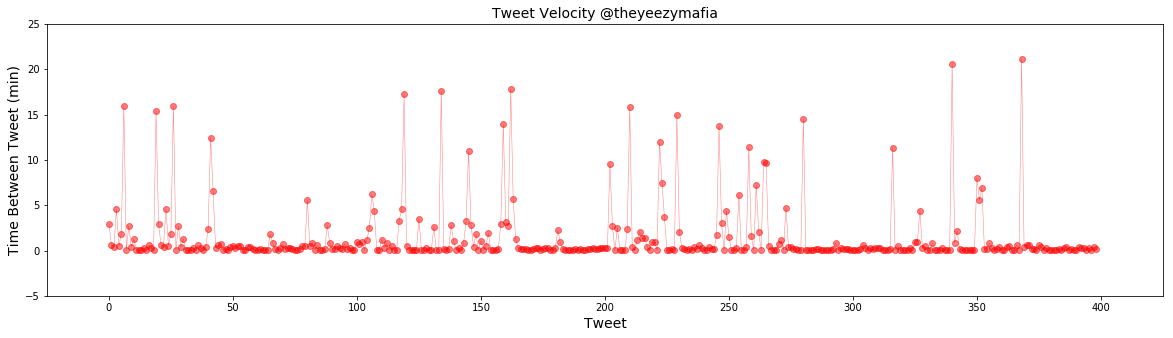

In [80]:
plt.figure(figsize=(20,5))
plt.plot(range(x_axis), y_axis, marker="o", 
               linewidth=0.5, alpha=0.5, color="r")
plt.xlabel('Tweet', fontsize = 14)
plt.ylabel('Time Between Tweet (min)', fontsize = 14)
plt.ylim(-5, 25, 5)
plt.xlim(-25, 425, 25)
plt.title("Tweet Velocity @theyeezymafia", fontsize = 14)
plt.show()